### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import funciones_proyecto as fn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score  
from sklearn.utils import resample
import scipy.stats as stats
import time
from sklearn.pipeline import Pipeline
import preprocessors as pp

### Carga de datos

In [2]:
data_o = pd.read_csv("churn.csv")
data = pd.DataFrame(data_o[0:2500])
data.head()

,index,age,gender,gender_code,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,0,XW0DQ7H,Village,Platinum Membership,17/08/2017,No,xxxxxxxx,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,0,5K0N3X1,City,Premium Membership,28/08/2017,?,CID21329,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,0,1F2TCL3,Town,No Membership,11/11/2016,Yes,CID12313,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,1,VJGJ33N,City,No Membership,29/10/2016,Yes,CID3793,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,0,SVZXCWB,City,No Membership,12/09/2017,No,xxxxxxxx,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1


### Tratamiento de variables numericas

In [3]:
col_numerics = fn.getContinuesCols(data)
col_categoricals = fn.select_categorical_cols(data)

In [4]:
data[col_numerics].isnull().mean()

index                    0.0000
age                      0.0000
avg_time_spent           0.0000
avg_transaction_value    0.0000
points_in_wallet         0.0952
dtype: float64

In [5]:
numeric_data = data[col_numerics]
categorical_data = data[col_categoricals]

In [6]:
numeric_data[col_numerics].isnull().mean()

index                    0.0000
age                      0.0000
avg_time_spent           0.0000
avg_transaction_value    0.0000
points_in_wallet         0.0952
dtype: float64

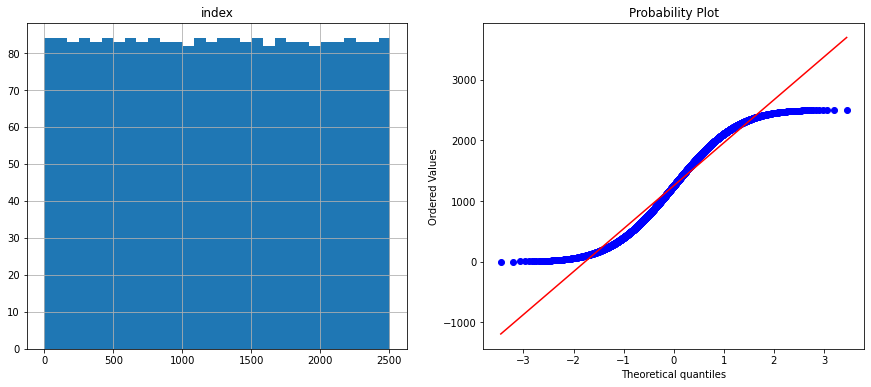

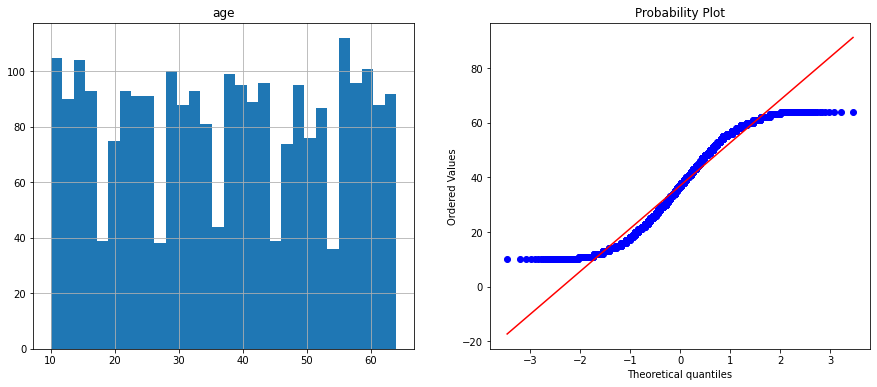

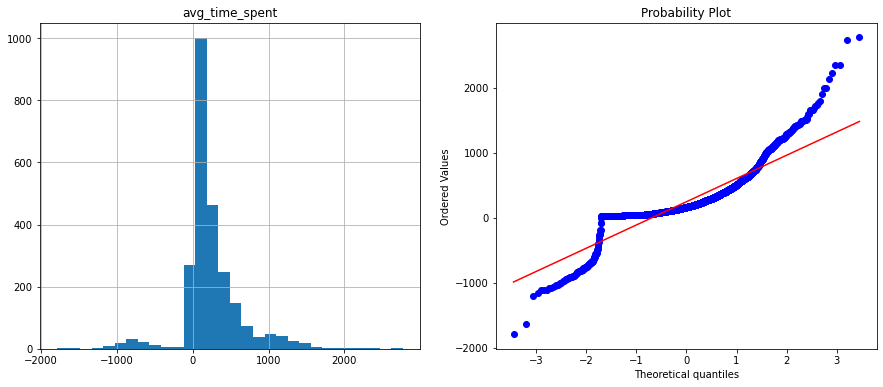

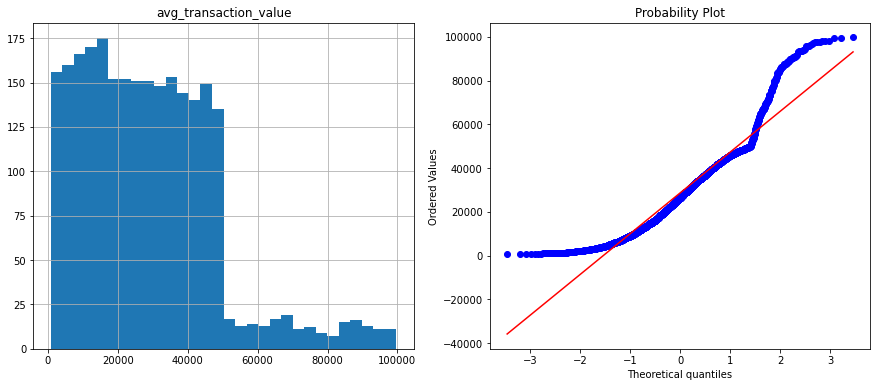

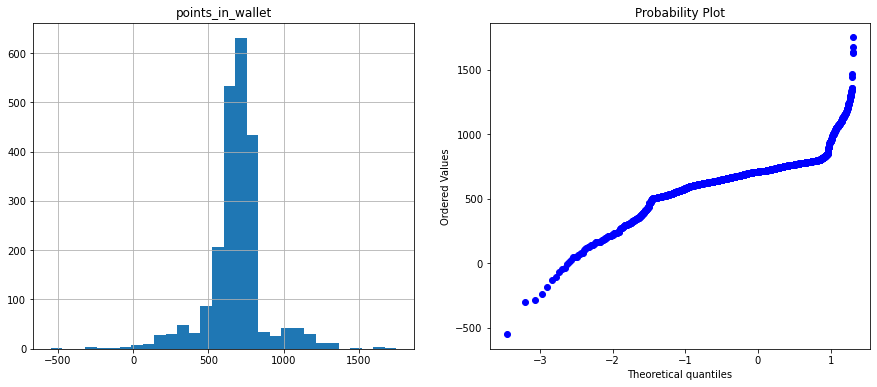

In [7]:
for col in col_numerics:
    fn.plot_density_variable(numeric_data, col) 

In [8]:
fn.FillNaN_Corr_DF(numeric_data, 'points_in_wallet', 'age' )

La media es: 687.0
La mediana es: 699.0
0.0058206865292346295
0.00575973950013687
Validacion Valores Nulos:
0


C:\Users\luish\Documents\Maestria\trimestre2\StatisticalLearning\proyecto2\Proyecto2\funciones_proyecto.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1] = df[col1].fillna(mean_val)


In [9]:
numeric_data[col_numerics].isnull().mean()

index                    0.0
age                      0.0
avg_time_spent           0.0
avg_transaction_value    0.0
points_in_wallet         0.0
dtype: float64

La media es: 28651.0
La mediana es: 26439.0
0.030610129508517193
0.030610129508517193
Validacion Valores Nulos:
0


C:\Users\luish\Documents\Maestria\trimestre2\StatisticalLearning\proyecto2\Proyecto2\funciones_proyecto.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1] = df[col1].fillna(mean_val)


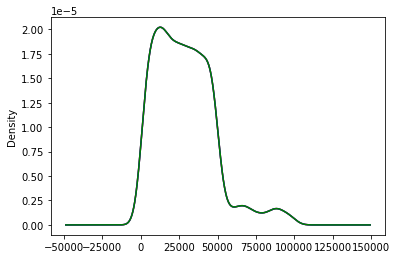

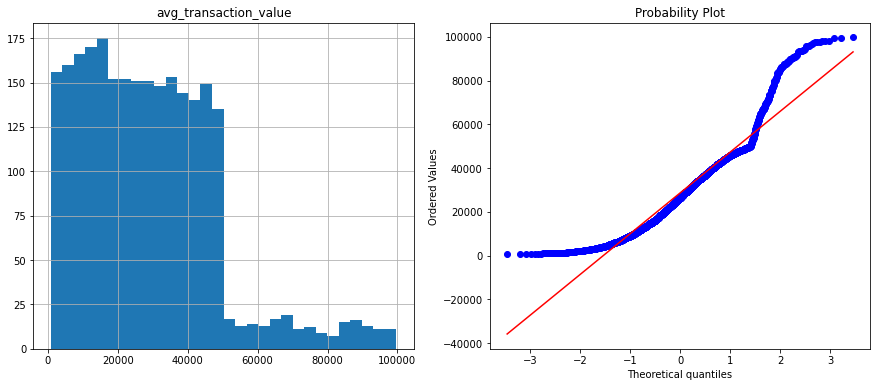

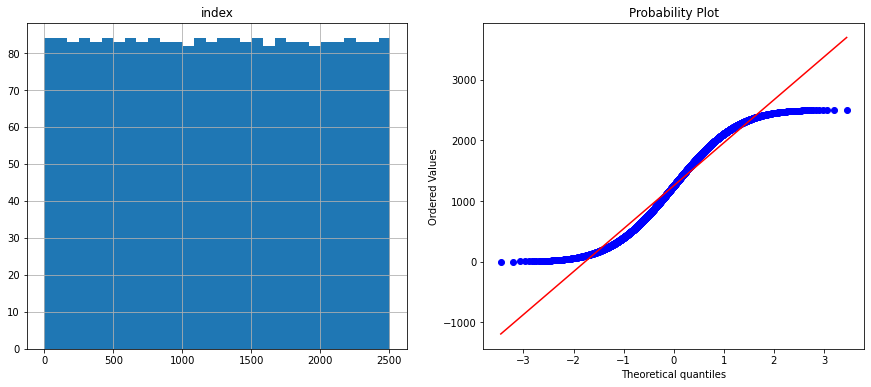

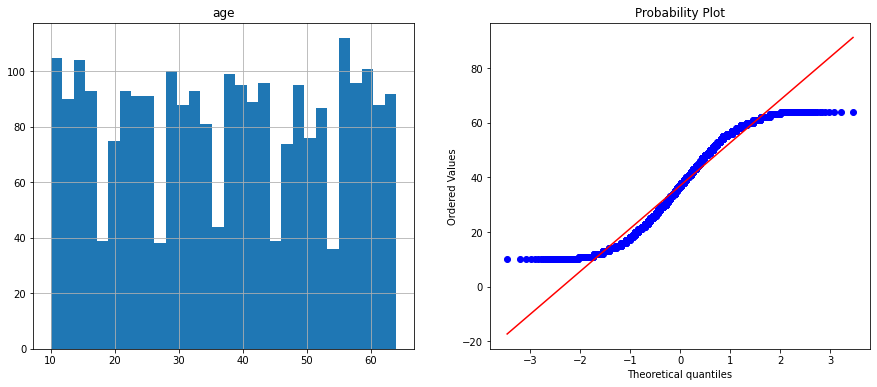

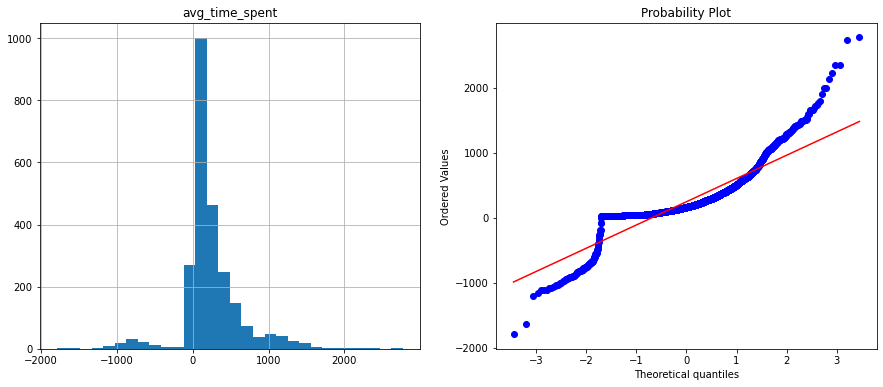

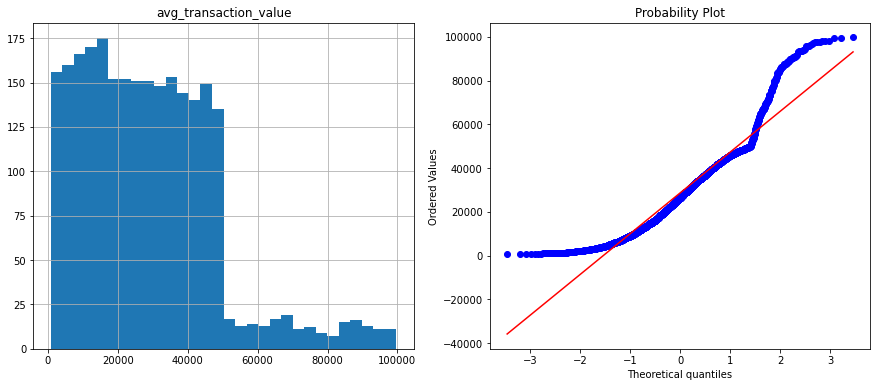

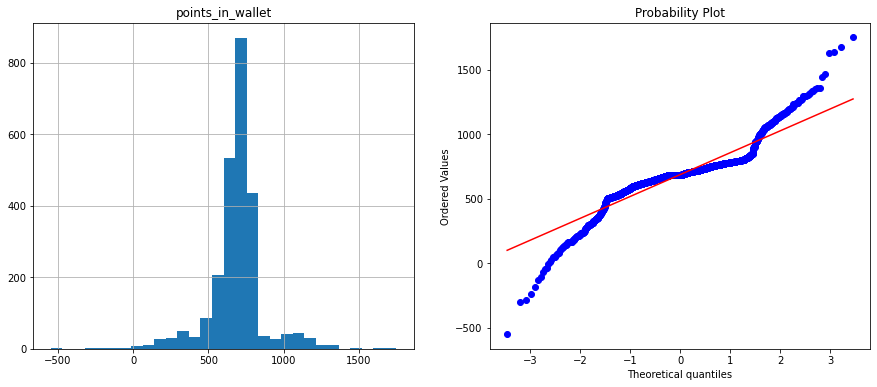

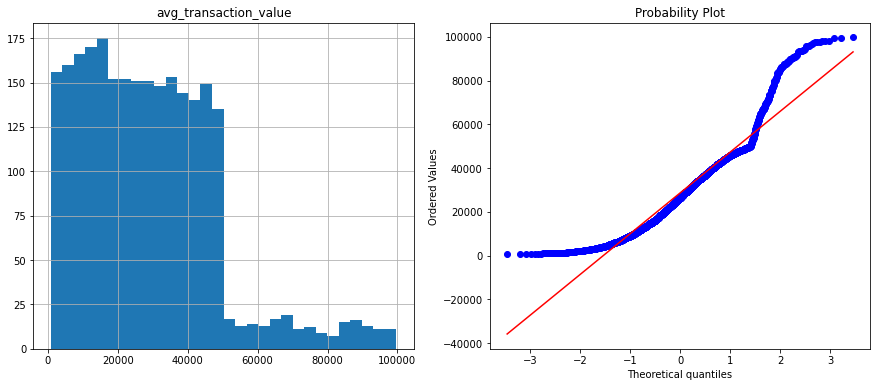

correlacion:  0.9984133827591442


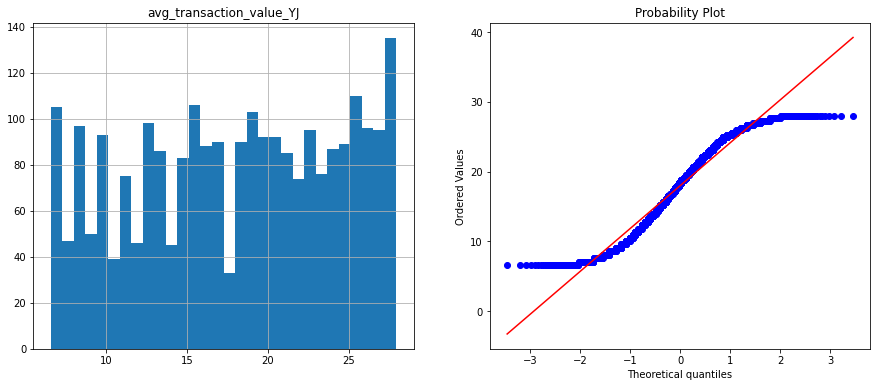

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


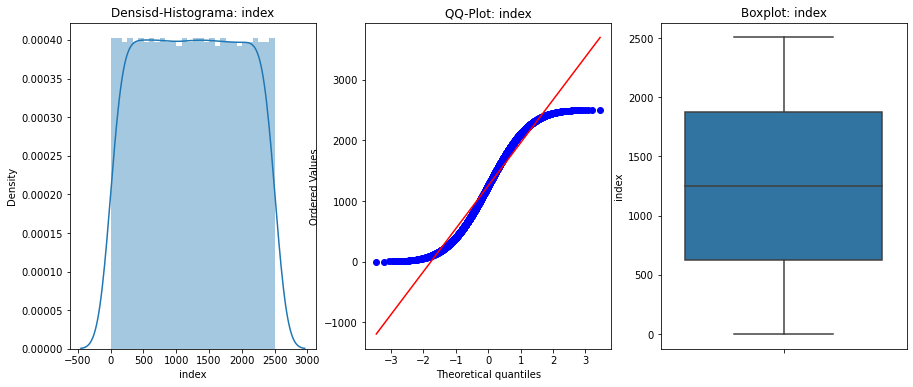

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


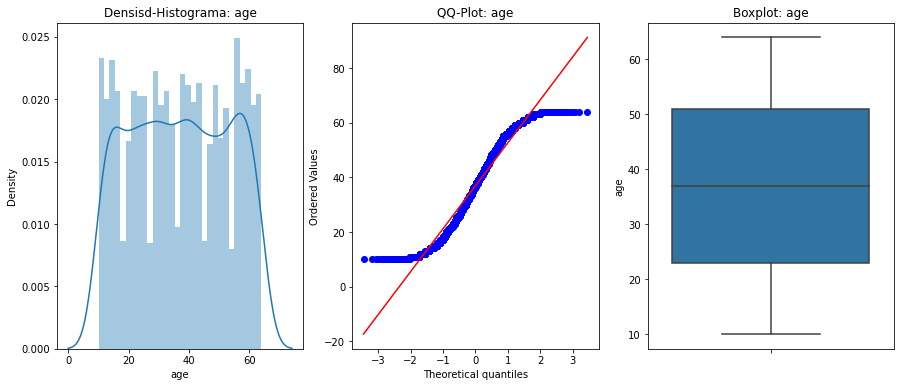

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


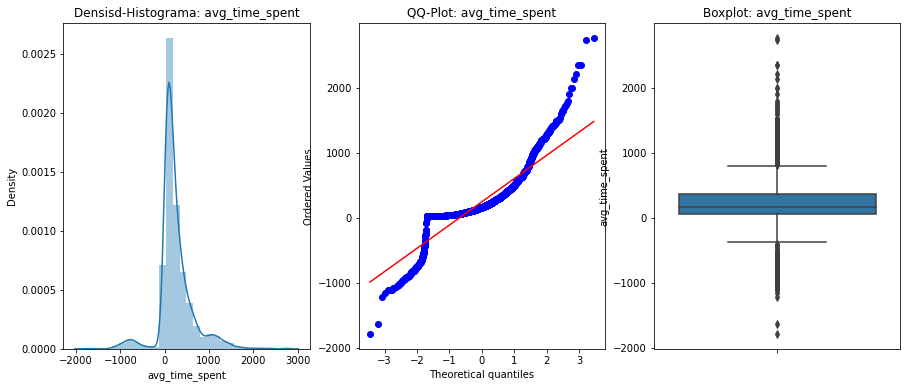

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


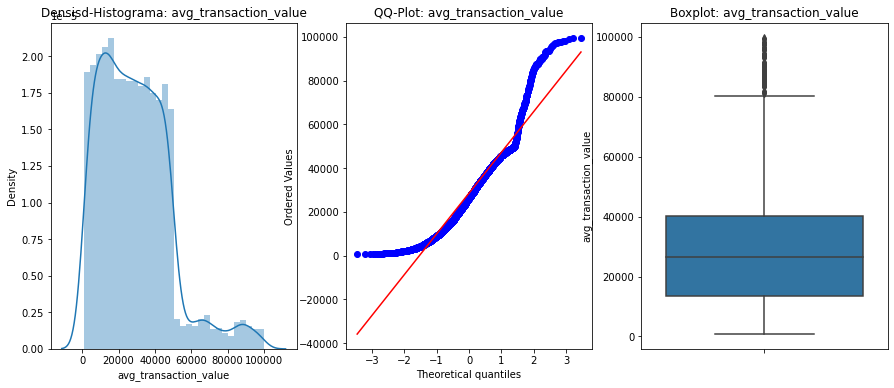

C:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


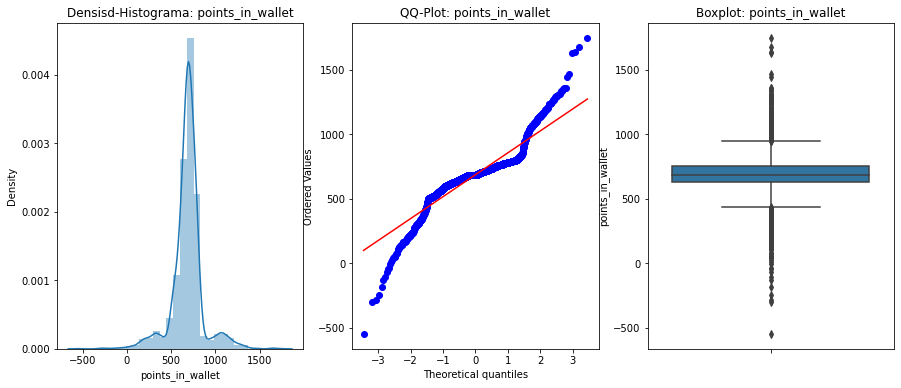

C:\Users\luish\Documents\Maestria\trimestre2\StatisticalLearning\proyecto2\Proyecto2\funciones_proyecto.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1] = np.where(df[col1] > LS, LS,
C:\Users\luish\Documents\Maestria\trimestre2\StatisticalLearning\proyecto2\Proyecto2\funciones_proyecto.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col1] = np.where(df[col1] > LS, LS,
C:\Users\luish\Documents\Maestria\trimestre2\StatisticalLearning\proyecto2\Proyecto2\funciones_proyecto.py:159: Settin

In [10]:
dataset_final = fn.funcion_final(numeric_data, 'avg_transaction_value','age', 1.75)

### Tratamiento variables Categoricas

In [11]:
data = pd.DataFrame(data_o[0:2500])

In [12]:
categoric_vars, discrete_vars , continues_vars = fn.getColumnsDataTypes(df=data)

In [13]:
categoric_vars

['gender',
 'security_no',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'referral_id',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [14]:
discrete_vars

['gender_code', 'days_since_last_login', 'churn_risk_score']

In [15]:
continues_vars

['index', 'age', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet']

In [16]:
data[categoric_vars].isnull().mean()

gender                          0.0000
security_no                     0.0000
region_category                 0.1420
membership_category             0.0000
joining_date                    0.0000
joined_through_referral         0.0000
referral_id                     0.0000
preferred_offer_types           0.0092
medium_of_operation             0.0000
internet_option                 0.0000
last_visit_time                 0.0000
avg_frequency_login_days        0.0000
used_special_discount           0.0000
offer_application_preference    0.0000
past_complaint                  0.0000
complaint_status                0.0000
feedback                        0.0000
dtype: float64

In [17]:
data[discrete_vars].isnull().mean()

gender_code              0.0
days_since_last_login    0.0
churn_risk_score         0.0
dtype: float64

In [18]:
data[continues_vars].isnull().mean()

index                    0.0000
age                      0.0000
avg_time_spent           0.0000
avg_transaction_value    0.0000
points_in_wallet         0.0952
dtype: float64

In [19]:
fn.FillNaN_Corr_DF(data, 'points_in_wallet', 'age' )

La media es: 687.0
La mediana es: 699.0
0.0058206865292346295
0.00575973950013687
Validacion Valores Nulos:
0


In [20]:
data[continues_vars].isnull().sum()

index                    0
age                      0
avg_time_spent           0
avg_transaction_value    0
points_in_wallet         0
dtype: int64

In [ ]:
##gender_map = data['gender'].value_counts().to_dict()
##gender_map

In [ ]:
##data['gender'] = data['gender'].map(gender_map)
##data.head()

In [21]:
fn.balanceo_datos(data, 'gender')    

M    1279
F    1221
Name: gender, dtype: int64

In [22]:
fn.balanceo_datos(data, 'gender')    
data_balanceada = data  

In [23]:
data_balanceada = data_balanceada.sample(frac=1, random_state=1234)
data_balanceada

,index,age,gender,gender_code,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
903,903,32,M,1,5KS66ZZ,City,Silver Membership,13/07/2016,No,xxxxxxxx,...,-767.716915,40076.46,11,1030.046318,No,Yes,Yes,Solved in Follow-up,Poor Website,0
674,674,39,F,0,K12SXB6,Village,Premium Membership,30/09/2015,Yes,CID29718,...,131.540000,13274.10,20,719.740000,No,Yes,Yes,Unsolved,Poor Customer Service,0
1624,1626,13,F,0,MHHX6QT,Village,Premium Membership,10/06/2016,No,xxxxxxxx,...,434.370000,76605.36,12,787.920000,No,Yes,No,Not Applicable,Products always in Stock,0
1214,1216,43,F,0,JFKX4E6,City,Gold Membership,19/01/2016,No,xxxxxxxx,...,113.670000,4334.34,24,730.640000,No,Yes,No,Not Applicable,Poor Product Quality,0
2164,2170,26,F,0,B4Q252M,Village,Gold Membership,29/05/2017,Yes,CID38258,...,391.260000,27063.12,Error,331.990585,Yes,Yes,Yes,Solved in Follow-up,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,279,16,F,0,6GPTGHP,Town,Gold Membership,01/10/2016,No,xxxxxxxx,...,220.070000,45054.80,12,623.930000,Yes,Yes,No,Not Applicable,Too many ads,1
2041,2047,22,F,0,D0OQBBQ,Village,No Membership,22/02/2017,No,xxxxxxxx,...,80.680000,29126.28,22,643.520000,Yes,No,No,Not Applicable,Poor Website,1
664,664,43,M,1,LU5B1HT,Town,Gold Membership,05/05/2017,No,xxxxxxxx,...,116.960000,46172.28,19,630.380000,No,Yes,Yes,Solved,Poor Website,1
1318,1320,12,F,0,RFUWLQT,City,Premium Membership,01/11/2015,?,CID37348,...,276.560000,8564.95,25,503.846203,Yes,No,Yes,Solved in Follow-up,Poor Website,0


In [24]:
X = data_balanceada[['avg_transaction_value','points_in_wallet']]
y = data_balanceada['gender']

In [25]:
lableEncoder = LabelEncoder()
lableEncoder.fit(['M', 'F'])
y = lableEncoder.transform(y.values)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle=True, random_state=1234)

In [27]:
start = time.time()
y_preds_svm = fn.modelo_svm(X_train, y_train, X_test)
end = time.time()
print("tiempo de entrenamiento: ", round(end - start), "segundos.")

tiempo de entrenamiento:  517 segundos.


In [28]:
print("Accuracy: ", accuracy_score(y_test, y_preds_svm))     
conf_matrix = pd.crosstab(y_test, y_preds_svm, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión: \n\n", conf_matrix)
fn.validacion_svm(conf_matrix)

Accuracy:  0.528
Matriz de Confusión: 

 Predicción    0    1
observación         
0            96  271
1            83  300
Sentitividad:  0.783289817232376
Especificidad:  0.2615803814713896


In [29]:
start = time.time()
y_preds_nb = fn.modelo_naive_bayes(X_train, y_train, X_test)
end = time.time()
print("tiempo de entrenamiento: ", round(end - start), "segundos.")

tiempo de entrenamiento:  0 segundos.


In [30]:
print("Accuracy: ", accuracy_score(y_test, y_preds_nb))
conf_matrix = pd.crosstab(y_test, y_preds_nb, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión: \n\n", conf_matrix)  
fn.validacion_nb(conf_matrix)

Accuracy:  0.48933333333333334
Matriz de Confusión: 

 Predicción     0    1
observación          
0            226  141
1            242  141
Sentitividad:  0.3681462140992167
Especificidad:  0.6158038147138964


In [31]:
start = time.time()
y_preds_tree = fn.modelo_arbol_decision(X_train, y_train, X_test)
end = time.time()
print("tiempo de entrenamiento: ", round(end - start), "segundos.")

tiempo de entrenamiento:  0 segundos.


In [32]:
print("Accuracy: ", accuracy_score(y_test, y_preds_tree))
conf_matrix = pd.crosstab(y_test, y_preds_tree, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión: \n\n", conf_matrix)
fn.validacion_dt(conf_matrix)

Accuracy:  0.49066666666666664
Matriz de Confusión: 

 Predicción     0    1
observación          
0            192  175
1            207  176
Sentitividad:  0.4595300261096606
Especificidad:  0.5231607629427792


In [33]:
start = time.time()
y_preds_knn = fn.modelo_knn(X_train, y_train, X_test)
end = time.time()
print("tiempo de entrenamiento: ", round(end - start), "segundos.")

tiempo de entrenamiento:  0 segundos.


In [34]:
print("Accuracy: ", accuracy_score(y_test, y_preds_knn))
conf_matrix = pd.crosstab(y_test, y_preds_knn, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión: \n\n", conf_matrix)
fn.validacion_knn(conf_matrix)

Accuracy:  0.5133333333333333
Matriz de Confusión: 

 Predicción     0    1
observación          
0            190  177
1            188  195
Sentitividad:  0.5091383812010444
Especificidad:  0.5177111716621253


In [35]:
start = time.time()
y_preds_lda = fn.modelo_lda(X_train, y_train, X_test)
end = time.time()
print("tiempo de entrenamiento: ", round(end - start), "segundos.")

tiempo de entrenamiento:  0 segundos.


In [36]:
print("Accuracy: ", accuracy_score(y_test, y_preds_lda))
conf_matrix = pd.crosstab(y_test, y_preds_lda, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión: \n\n", conf_matrix)
fn.validacion_lda(conf_matrix)

Accuracy:  0.524
Matriz de Confusión: 

 Predicción     0    1
observación          
0            110  257
1            100  283
Sentitividad:  0.7389033942558747
Especificidad:  0.2997275204359673


In [37]:
start = time.time()
y_preds_qda = fn.modelo_qda(X_train, y_train, X_test)
end = time.time()
print("tiempo de entrenamiento: ", round(end - start), "segundos.")

tiempo de entrenamiento:  0 segundos.


In [38]:
print("Accuracy: ", accuracy_score(y_test, y_preds_qda))
conf_matrix = pd.crosstab(y_test, y_preds_qda, rownames=["observación"], colnames=["Predicción"])
print("Matriz de Confusión: \n\n", conf_matrix)
fn.validacion_qda(conf_matrix)

Accuracy:  0.48533333333333334
Matriz de Confusión: 

 Predicción     0    1
observación          
0            228  139
1            247  136
Sentitividad:  0.35509138381201044
Especificidad:  0.6212534059945504


In [39]:
fn.print_roc(y_test,y_preds_svm,y_preds_nb,y_preds_tree,y_preds_knn,y_preds_lda, y_preds_qda)


ROC-ACU -> SVM =  0.5224350993518828
ROC-ACU -> NB =  0.49197501440655655
ROC-ACU -> Tree =  0.49134539452621995
ROC-ACU -> KNN =  0.5134247764315849
ROC-ACU -> LDA =  0.519315457345921
ROC-ACU -> QDA =  0.48817239490328046


In [40]:
svm_prob, svm_prob_v, _ = roc_curve(y_test, y_preds_svm)
nb_prob, nb_prob_v, _ = roc_curve(y_test, y_preds_nb)
tree_prob, tree_prob_v, _ = roc_curve(y_test, y_preds_tree)
knn_prob, knn_prob_v, _ = roc_curve(y_test, y_preds_knn)
lda_prob, lda_prob_v, _ = roc_curve(y_test, y_preds_lda)
qda_prob, qda_prob_v, _ = roc_curve(y_test, y_preds_qda)

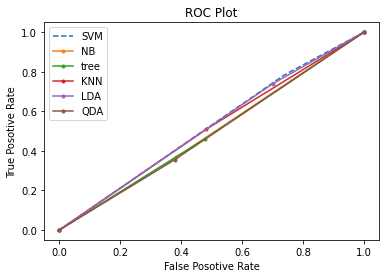

In [41]:
plt.plot(svm_prob, svm_prob_v, linestyle="--", label="SVM")
plt.plot(nb_prob, nb_prob_v, marker='.', label="NB")
plt.plot(tree_prob, tree_prob_v, marker='.', label="tree")
plt.plot(knn_prob, knn_prob_v, marker='.', label="KNN")
plt.plot(lda_prob, lda_prob_v, marker='.', label="LDA")
plt.plot(qda_prob, qda_prob_v, marker='.', label="QDA")
plt.title("ROC Plot")
plt.xlabel("False Posotive Rate")
plt.ylabel("True Posotive Rate")
plt.legend()
plt.show()

In [42]:
lr = 'LogisticRegression().fit(X_train, y_train)'
svm = 'SVC(gamma="scale", kernel="rbf").fit(X_train, y_train)'
dt = 'DecisionTreeClassifier(criterion="gini", max_depth=4).fit(X_train, y_train)'
knn = 'KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)'
nb = 'GaussianNB().fit(X_train, y_train)'
lda = 'LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X_train, y_train)'
qda = 'QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)'

models_list = {"lr" :lr, "svm":svm, "dt": dt,  "knn":knn, "nb":nb, "lda":lda, "qda":qda}
models_list

{'lr': 'LogisticRegression().fit(X_train, y_train)',
 'svm': 'SVC(gamma="scale", kernel="rbf").fit(X_train, y_train)',
 'dt': 'DecisionTreeClassifier(criterion="gini", max_depth=4).fit(X_train, y_train)',
 'knn': 'KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)',
 'nb': 'GaussianNB().fit(X_train, y_train)',
 'lda': 'LinearDiscriminantAnalysis(solver="svd", store_covariance=True).fit(X_train, y_train)',
 'qda': 'QuadraticDiscriminantAnalysis(store_covariance=True).fit(X_train, y_train)'}

In [43]:
y_train = pd.DataFrame(y_train)
y_train.columns = ['gender']

In [44]:
dataset = pd.concat([X_train, y_train], axis=1)

In [45]:
fn.FillNaN_Corr_DF(dataset, 'points_in_wallet', 'gender' )
fn.FillNaN_Corr_DF(dataset, 'avg_transaction_value', 'gender' )
fn.FillNaN_Corr_DF(dataset, 'gender', 'gender' )

La media es: 686.0
La mediana es: 687.0
nan
nan
Validacion Valores Nulos:
0
La media es: 28417.0
La mediana es: 26257.0
nan
nan
Validacion Valores Nulos:
0
La media es: 1.0
La mediana es: 1.0
nan
nan
Validacion Valores Nulos:
0


In [46]:
train_models_list = {}

In [47]:
for model_name, model in models_list.items():
    boot = resample(dataset, replace=True, n_samples=200, random_state=2020)
    X_train = boot.drop('gender', axis = 1)
    y_train = boot.gender
    train_model = eval(model)
    train_models_list[model_name] = train_model

In [48]:
train_models_list

{'lr': LogisticRegression(),
 'svm': SVC(),
 'dt': DecisionTreeClassifier(max_depth=4),
 'knn': KNeighborsClassifier(),
 'nb': GaussianNB(),
 'lda': LinearDiscriminantAnalysis(store_covariance=True),
 'qda': QuadraticDiscriminantAnalysis(store_covariance=True)}

In [49]:
auc_scores = {}
results_matrix = pd.DataFrame(columns=np.arange(0, len(y_test), 1).tolist())

for model_name, train_model in train_models_list.items():
    predicciones = train_model.predict(X_test)
    auc = roc_auc_score(y_test, predicciones)
    auc_scores[model_name] = auc
    tempDf = pd.DataFrame(predicciones).T
    results_matrix = results_matrix.append(tempDf)

In [50]:
results_matrix.index=list(train_models_list.keys())
results_matrix

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
lr,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
svm,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
dt,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
knn,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
nb,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
lda,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
qda,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [51]:
votacion = results_matrix.apply(pd.value_counts)
votacion

,0,1,2,3,4,5,6,7,8,9,...,740,741,742,743,744,745,746,747,748,749
0.0,NaN,3,NaN,NaN,2,1,NaN,NaN,1,NaN,...,NaN,NaN,NaN,1,1,NaN,1,NaN,1,NaN
1.0,7.0,4,7.0,7.0,5,6,7.0,7.0,6,7.0,...,7.0,7.0,7.0,6,6,7.0,6,7.0,6,7.0


In [52]:
final_predictions = []

for (columnName, columnData) in votacion.iteritems():
    column_result = columnData.values
    final_predictions.append(np.nanargmax(column_result, axis=0))

final_predictions

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [53]:
auc = roc_auc_score(y_test, final_predictions)
auc
auc_scores

{'lr': 0.5,
 'svm': 0.5,
 'dt': 0.4663028862913611,
 'knn': 0.5017679157091939,
 'nb': 0.5105754796849766,
 'lda': 0.5,
 'qda': 0.5172167244114655}